In [1]:
import os, shutil

original_dataset_dir = r"C:\Users\9kish\Jupyter_work\train"

base_dir = r"C:\Users\9kish\Jupyter_work\cats_and_dogs_small"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [2]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [3]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [22]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc'])

In [23]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size = (150, 150),
                                                       batch_size=20,
                                                       class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/25


C:\Users\9kish\AppData\Local\Temp\ipykernel_20096\460796348.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 50s 484ms/step - loss: 0.6950 - acc: 0.5020 - val_loss: 0.6884 - val_acc: 0.5740
Epoch 2/25
100/100 [==============================] - 48s 479ms/step - loss: 0.6901 - acc: 0.5305 - val_loss: 0.6834 - val_acc: 0.5050
Epoch 3/25
100/100 [==============================] - 49s 487ms/step - loss: 0.6822 - acc: 0.5695 - val_loss: 0.6885 - val_acc: 0.5130
Epoch 4/25
100/100 [==============================] - 49s 487ms/step - loss: 0.6726 - acc: 0.5830 - val_loss: 0.6506 - val_acc: 0.6260
Epoch 5/25
100/100 [==============================] - 49s 490ms/step - loss: 0.6540 - acc: 0.6205 - val_loss: 0.6520 - val_acc: 0.6050
Epoch 6/25
100/100 [==============================] - 50s 496ms/step - loss: 0.6441 - acc: 0.6275 - val_loss: 0.6152 - val_acc: 0.6630
Epoch 7/25
100/100 [==============================] - 49s 494ms/step - loss: 0.6291 - acc: 0.6430 - val_loss: 0.5932 - val_acc: 0.6930
Epoch 8/25
100/100 [==============================] - 49s 491ms/st

In [26]:
model.save('cats_and_dogs_small_2.h5')

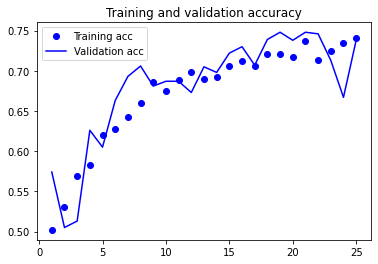

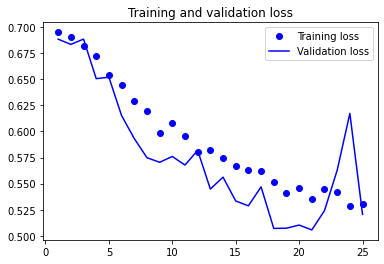

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [5]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top = False,
                 input_shape = (150, 150, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [6]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step


In [7]:
train_features = np.reshape( train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape( validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape( test_features, (1000, 4 * 4 * 512))

In [8]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

D:\coding stuff\Jupyter\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
100/100 [==============================] - 6s 40ms/step - loss: 0.6246 - acc: 0.6435 - val_loss: 0.4377 - val_acc: 0.8410
Epoch 2/30
100/100 [==============================] - 4s 39ms/step - loss: 0.4327 - acc: 0.8090 - val_loss: 0.3584 - val_acc: 0.8740
Epoch 3/30
100/100 [==============================] - 4s 40ms/step - loss: 0.3597 - acc: 0.8435 - val_loss: 0.3159 - val_acc: 0.8830
Epoch 4/30
100/100 [==============================] - 4s 36ms/step - loss: 0.3289 - acc: 0.8660 - val_loss: 0.2965 - val_acc: 0.8940
Epoch 5/30
100/100 [==============================] - 3s 35ms/step - loss: 0.2833 - acc: 0.8895 - val_loss: 0.2794 - val_acc: 0.8870
Epoch 6/30
100/100 [==============================] - 4s 35ms/step - loss: 0.2665 - acc: 0.8915 - val_loss: 0.2678 - val_acc: 0.8950
Epoch 7/30
100/100 [==============================] - 4s 36ms/step - loss: 0.2451 - acc: 0.9020 - val_loss: 0.2655 - val_acc: 0.8890
Epoch 8/30
100/100 [==============================] - 4s 36ms/step - 

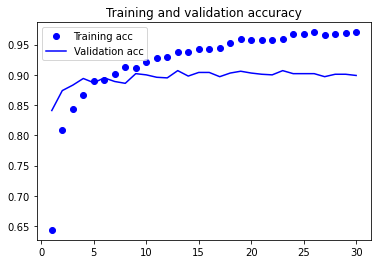

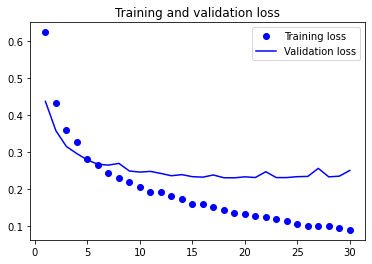

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator( rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=2e-5),
                metrics=['acc'])

history = model.fit(train_generator,
                                steps_per_epoch=100,
                                epochs=20,
                                validation_data=validation_generator,
                                validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
 16/100 [===>..........................] - ETA: 7:54 - loss: 0.3611 - acc: 0.8531

KeyboardInterrupt: 

In [14]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [15]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:76
        layer.trainable = True
    else:
        layer.trainable = False

In [17]:
model.compile(  loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-5),
                metrics=['acc'])

history = model.fit_generator(  train_generator,
                                steps_per_epoch=75,
                                epochs=50,
                                validation_data=validation_generator,
                                validation_steps=50)

Epoch 1/50


C:\Users\9kish\AppData\Local\Temp\ipykernel_22640\1199989805.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(  train_generator,


75/75 [==============================] - 175s 2s/step - loss: 0.1409 - acc: 0.9387 - val_loss: 0.1217 - val_acc: 0.9510
Epoch 2/50
75/75 [==============================] - 173s 2s/step - loss: 0.1223 - acc: 0.9460 - val_loss: 0.1181 - val_acc: 0.9510
Epoch 3/50
75/75 [==============================] - 174s 2s/step - loss: 0.1287 - acc: 0.9493 - val_loss: 0.1215 - val_acc: 0.9550
Epoch 4/50
75/75 [==============================] - 177s 2s/step - loss: 0.1274 - acc: 0.9540 - val_loss: 0.1348 - val_acc: 0.9500
Epoch 5/50
75/75 [==============================] - 188s 3s/step - loss: 0.1098 - acc: 0.9607 - val_loss: 0.1155 - val_acc: 0.9580
Epoch 6/50
75/75 [==============================] - 181s 2s/step - loss: 0.1166 - acc: 0.9573 - val_loss: 0.1263 - val_acc: 0.9490
Epoch 7/50
75/75 [==============================] - 178s 2s/step - loss: 0.1138 - acc: 0.9553 - val_loss: 0.1215 - val_acc: 0.9550
Epoch 8/50
75/75 [==============================] - 175s 2s/step - loss: 0.1016 - acc: 0.9633 

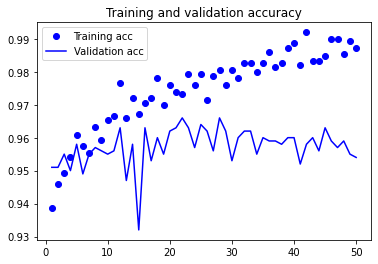

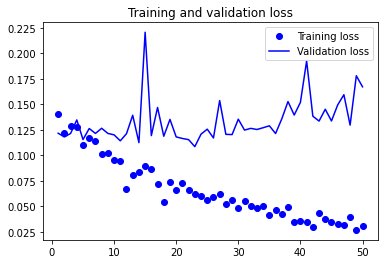

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


C:\Users\9kish\AppData\Local\Temp\ipykernel_22640\1123313174.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.9639999866485596
